In [359]:
import numpy as np
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

In [360]:
X = np.array(['Chat', 
         'Chien',
         'Chat',
         'Oiseau'])

In [361]:
transformer = LabelEncoder()
transformer.fit_transform(X)

array([0, 1, 0, 2])

# Label Encoder

In [362]:
import matplotlib.pyplot as plt

In [363]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [364]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2])

In [365]:
encoder.inverse_transform(np.array([0, 0, 2, 2])) 

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

# Ordinal Encoder

In [366]:
X = np.array([['Chat', 'Poils'],
            ['Chien', 'Poils'],
            ['Chat', 'Poils'],
            ['Oiseau', 'Plumes']])

In [367]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

  # Label Binarizer

In [368]:
from sklearn.preprocessing import LabelBinarizer

In [369]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [370]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

# One Hot Encoder

In [371]:
from sklearn.preprocessing import OneHotEncoder
X = np.array([['Chat', 'Poils'],
            ['Chien', 'Poils'],
            ['Chat', 'Poils'],
            ['Oiseau', 'Plumes']])

In [372]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# Normalisation MinMaxScaler

In [373]:
from sklearn.preprocessing import MinMaxScaler

In [374]:
X = np.array([[70],
            [80],
            [120]])

In [375]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

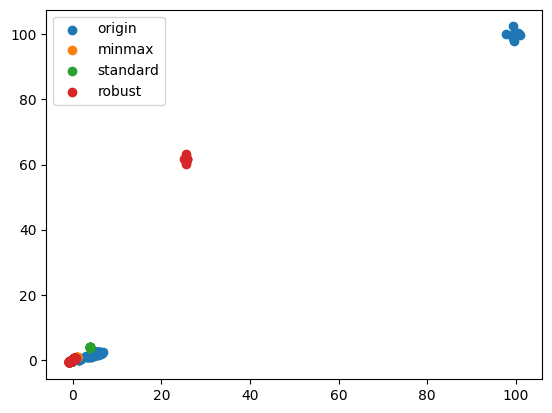

In [376]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler , RobustScaler
iris = load_iris()
X = iris.data

outliers = np.full((10,4) , 100) + np.random.randn(10,4)
X = np.vstack((X, outliers))
X_min = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)
plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_min[:, 2], X_min[:, 3])
plt.scatter(X_std[:, 2], X_std[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])
# le premier plt scatter en origin et l'autre en bleu
plt.legend(['origin', 'minmax' , 'standard', 'robust'])
plt.show()

# Standardisation

In [377]:
from sklearn.preprocessing import StandardScaler

In [378]:
X = np.array([[70],
            [80],
            [120]])

In [379]:
scaller = StandardScaler()
scaller.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

# RobustScaler(en haut exemple)

# Polynomial Features

In [380]:
from sklearn.preprocessing import PolynomialFeatures

In [381]:
X = np.array([[1],
              [2],
              [0.5]])

In [382]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

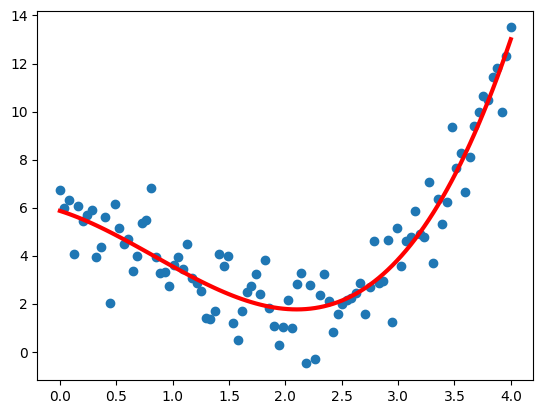

In [383]:
from sklearn.linear_model import LinearRegression
X = np.linspace(0, 4, 100).reshape(100, 1)
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

X_poly = PolynomialFeatures(3).fit_transform(X)

plt.scatter(X, y)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, color='red' , lw=3)

# Transformers Non Linear

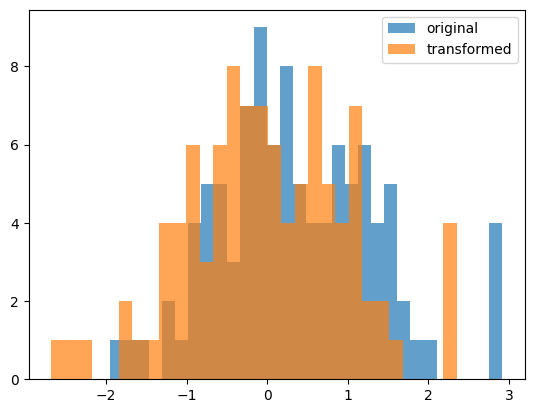

In [384]:
np.random.seed(0)
# import le Power Transformer
from sklearn.preprocessing import PowerTransformer
X = np.random.rand(100 , 2) + np.random.randn(100, 2)
X2 = PowerTransformer().fit_transform(X)
plt.hist(X[:,0], bins=30 , alpha=0.7 , label='original')
plt.hist(X2[:,0], bins=30 , alpha=0.7 , label='transformed')
plt.legend()
plt.show()

# Sans Pipeline

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris

In [386]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [387]:
# Transformer
scaller = StandardScaler()
X_train_transformed = scaller.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

# Test
X_test_transformed = scaller.transform(X_test)
model.predict(X_test_transformed)

array([2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 2])

# Pipeline

In [388]:
from sklearn.pipeline import make_pipeline

In [389]:
model = make_pipeline(StandardScaler(), 
                      SGDClassifier(random_state=0))

model.fit(X_train , y_train)
model.predict(X_test)


array([2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 2])

In [390]:
from sklearn.model_selection import GridSearchCV

In [391]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))

In [397]:
model = SGDClassifier(random_state=0)
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.58

In [393]:
print(model)

param = {
    'polynomialfeatures__degree' : [2, 3, 4],
    'sgdclassifier__penalty' : ['l1', 'l2'],
}

grid = GridSearchCV(model, param, cv=4)

grid.fit(X_train, y_train)
         

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [394]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'sgdclassifier__penalty': 'l1'}

In [395]:
grid.score(X_test, y_test)

0.9